In [101]:
import numpy 
import scipy


In [104]:
class neuralNetwork:
    #import numpy
    #initialise the network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        import numpy
        import scipy
        
        #set self, inputnodes, hiddennodes, outputnodes, learningrate
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        
        #link weight matrices, wih and who
        #weight inside the arrays are w_i_j, where link is from node i to node j in next layer
        #w11 w21
        #w12 w22 etc
        #below is input to hidden
        self.wih = (numpy.random.rand(self.hnodes, self.inodes)-0.5)
        #below is hidden to output
        self.who = (numpy.random.rand(self.onodes, self.hnodes)-0.5)
        
        #a more sophisticated approach, sample the weights from a normal 
        #probability distribution centred around zero and with a standard
        #deviation that is related to the number of incoming links into a 
        #node, 1/√(number of incoming links)
        # (distribution center, std-dev, np-array-size)
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -.5), (self.onodes, self.hnodes))
        
        #activation function is a sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
        
    
    #train network
    def train(self, inputs_list, targets_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #calculate the signal to hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate signal coming out of hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #calculate signals coming out of final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #output layer error is the (target-actual)
        output_errors = targets - final_outputs
        #hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #update the weights for the links between the hidden and output layers
        self.who += self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
        
        #update the weight for the links between the input and hidden layers
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    #QUERY the network
    def query(self, inputs_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        print('inputs: ', '\n', inputs)
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hiddenlayer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    def printThis():
        print(inodes, hnodes, onodes, lr)

In [34]:
#trying instantiation of Neural Network
inputnodes=3
hiddennodes=3 
outputnodes=3 
learningrate=.8
NN = neuralNetwork(inputnodes, hiddennodes, outputnodes, learningrate)


In [35]:
NN.query([1.0, 3.5, -1.5])

inputs:  
 [[ 1. ]
 [ 3.5]
 [-1.5]]


array([[0.48904598],
       [0.30942736],
       [0.61610059]])

In [39]:
import numpy as np
# np.random.rand(3,2) -.5
np.random.normal(0.0, pow(9,-0.5),(5,4))

array([[-0.06759488,  0.06715098, -0.23400487, -0.00836146],
       [ 0.3008511 , -0.06956823,  0.05688468, -0.01805967],
       [ 0.30087886, -0.56002772, -0.34785235,  0.79300105],
       [ 0.12334526,  0.0858434 , -0.28231527,  0.59611638],
       [ 0.05656274,  0.08419643, -0.42886879,  0.19947863]])

In [55]:
data_file = open("mnist_dataset/mnist_train_100.csv", "r")
data_list = data_file.readlines()
data_file.close()
# data_list[0]

In [64]:
import numpy
import matplotlib.pyplot
%matplotlib inline

value:  [0.]


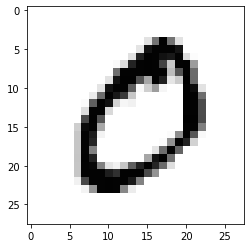

In [97]:
all_values = data_list[1].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
print('value: ' , numpy.asfarray(all_values[0]).reshape((1,1))[0] )
# print(all_values)

## Preparing the MNIST training Data

Neural networks work better if the input data, and also the output values, are of the right shape so that they stay within the comfort zone of the network node activation functions.

We will rescale the input colour values from the larger range 0 to 255 to the much smaller range 0.01 - 1.0. We’ve deliberately chosen 0.01 as the lower end of the range to avoid the problems we saw earlier with zero valued inputs because they can artificially kill weight updates. We don’t have to choose 0.99 for the upper end of the input because we don’t need to avoid 1.0 for the inputs. It’s only for the outputs that we should avoid the impossible to reach 1.0.

Dividing the raw inputs which are in the range 0-255 by 255 will bring them into the range 0-1. We then need to multiply by 0.99 to bring them into the range 0.0 - 0.99. We then add 0.01 to shift them up to the desired range 0.01 to 1.00.

```python
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
```

In [88]:
#scale input to range 0.01 to 1.00
scales_input = (numpy.asfarray(all_values[1:]) / 225.0 * 0.99) + 0.01
print(scales_input[0:5])

[0.01 0.01 0.01 0.01 0.01]


In [98]:
#output noes is 10
onodes = 10
targets = numpy.zeros(onodes) + 0.01
print(targets)
targets[int(all_values[0])] = 0.99 
targets

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [106]:
#number of input, hidden and output nodes, learning rate
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

#create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

#train the neural network

#go through all the records in the training data set
for record in training_data_list:
    #split record by the ',' comas
    all_values = record.split(',')
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    #create the target output values (all=0.01, desired label = 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    #all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [108]:
#Testing

#load test data
test_data_file = open("mnist_dataset/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()